In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
from torchvision import models
import os,sys
import matplotlib.pyplot as plt
import numpy as np
from utils import train,test
import pandas as pd
import glob
from skimage import io

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
def load_torch_model(model_ft,model_path,device):
    for param in model_ft.parameters():
        param.requires_grad = False    
    param_update=[]
    for name,param in model_ft.layer3.named_parameters():
        param.requires_grad = True
        param_update.append(param)
    for name,param in model_ft.layer4.named_parameters():
        param.requires_grad = True
        param_update.append(param)
    for name,param in model_ft.fc.named_parameters():
        param.requires_grad = True
        param_update.append(param)
#    model_ft = nn.DataParallel(model_ft)
    
    model_wts = torch.load(model_path)
    model_ft.load_state_dict(model_wts) 
    model_ft = nn.DataParallel(model_ft)
    model_ft = model_ft.to(device)
    return model_ft

In [3]:
if __name__ == '__main__':
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")        
    batch_size = 64
    data_dir_ori = {'train':'./train',
                'val':'./val'}
    
    model_save_path = './MIP'
    model_base_name = 'resnet_18'

    model_path = './resnet_18_2.pth'
    model_ft = models.resnet18(pretrained = False)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, 2)
    model_ft = load_torch_model(model_ft,model_path,device)

In [4]:
    train_epoch = train.Epoch(
            model_ft, 
            data_dir_ori, 
            1, 
            model_save_path,
            model_base_name,
            batch_size,
            [0.485,0.456,0.406],
            [0.229,0.224,0.225]
            )
    
    model_wts,train_loss,train_acc,val_loss,val_acc = train_epoch.run(10,3)

Epoch 0/9
----------
train: 100%|██████████| 4657/4657 [5:50:39<00:00,  8.13s/it, CrossEntropyLoss - 0.5945, Balanced_acc - 0.7389, recall - 0.7241]   
train Loss: 0.6787 Acc: 0.6010

val: 100%|██████████| 1314/1314 [2:57:34<00:00, 11.74s/it, CrossEntropyLoss - 0.6898, Balanced_acc - 0.5165, recall - 0.5417]  
val Loss: 0.6674 Acc: 0.5816

Epoch early stop: 0/9
Epoch 1/9
----------
train: 100%|██████████| 4657/4657 [7:48:34<00:00,  1.10it/s, CrossEntropyLoss - 0.7172, Balanced_acc - 0.4744, recall - 0.5862]   
train Loss: 0.6571 Acc: 0.6110

val: 100%|██████████| 1314/1314 [3:05:20<00:00,  9.33s/it, CrossEntropyLoss - 0.6807, Balanced_acc - 0.4762, recall - 0.7083]  
val Loss: 0.6637 Acc: 0.5891

Epoch 2/9
----------
train: 100%|██████████| 4657/4657 [13:33:32<00:00,  9.62s/it, CrossEntropyLoss - 0.6688, Balanced_acc - 0.4125, recall - 0.5517]   
train Loss: 0.6495 Acc: 0.6202

val: 100%|██████████| 1314/1314 [5:08:54<00:00, 19.96s/it, CrossEntropyLoss - 0.6274, Balanced_acc - 0.625, r

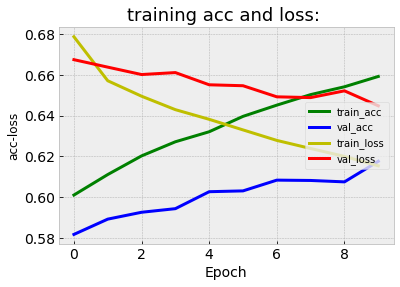

In [5]:
    plt.figure()
    plt.style.use('bmh') # bmh
    plt.title("training acc and loss: ", fontsize=18)
    train_acc, = plt.plot(train_acc,c = 'g',linewidth=3)
    val_acc, = plt.plot(val_acc,c = 'b',linewidth=3)
    train_loss, = plt.plot(train_loss,c = 'y',linewidth=3)
    val_loss, = plt.plot(val_loss,c = 'r',linewidth=3)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel('acc-loss')
    plt.tick_params(axis='both', labelsize=14)
    plt.legend(handles=[train_acc, val_acc,train_loss,val_loss], labels=['train_acc', 'val_acc','train_loss','val_loss'],
        loc='center right') 
    plt.show()
    plt.close()